In [11]:
# === 1. Importar librerías ===
from drawdata import ScatterWidget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import ipywidgets as widgets
widgets.Button(description="PROBAR")

Button(description='PROBAR', style=ButtonStyle())

In [13]:
import ipywidgets
ipywidgets.__version__


'8.1.8'

In [14]:
widget = ScatterWidget()

In [15]:
from IPython.display import display
display(widget)

In [16]:
# Obtener datos del widget
X, y = widget.data_as_X_y

In [17]:
widget.data_as_X_y

(array([[149.03933902, 210.73063402],
        [162.0184417 , 213.97900173],
        [181.34578895, 206.95616232],
        [198.46496356, 222.96126235],
        [266.38553851, 243.62145085],
        [317.45543638, 238.78605334],
        [357.64901664, 250.90878975],
        [356.1944461 , 254.95666093],
        [361.21345997, 231.13747989],
        [389.75964923, 254.69988558],
        [401.02938871, 227.97827031],
        [399.25342972, 227.10611424],
        [408.70580005, 257.2989659 ],
        [427.59444835, 258.29963416],
        [445.78509178, 261.34140975],
        [512.33776283, 228.21981281],
        [556.50845132, 215.47624445],
        [563.99301961, 226.69783087],
        [144.57529899,  85.86030382],
        [160.83772978,  78.88883618],
        [157.03807479,  88.01446687],
        [215.66090303,  83.96015547],
        [276.42348019, 107.65460376],
        [409.08647474, 112.45961735],
        [546.95750368, 142.01312999],
        [635.04640061, 140.87671674],
        [676

In [18]:
# Convertir etiquetas de color a números
le = LabelEncoder()
y = le.fit_transform(y)

print("Clases originales:", le.classes_)
print("y numérico:", y)

Clases originales: ['#1f77b4' '#ff7f0e']
y numérico: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
print(type(widget.data_as_X_y))

<class 'tuple'>


In [20]:
print(f"Datos cargados: {X.shape[0]} puntos, {len(np.unique(y))} clases detectadas")

Datos cargados: 58 puntos, 2 clases detectadas


In [21]:
from sklearn.decomposition import PCA

if X.shape[1] > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)


In [22]:
#=====================
# 1. Definir Modelos
# =====================
models = {
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Regresión Logística": LogisticRegression(max_iter=200),
    "Árbol de Decisión": DecisionTreeClassifier()
}

metricas = []   # Para guardar la tabla


In [23]:
# =====================
# 2. Función de frontera
# =====================
def plot_decision_boundary(model, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=50, edgecolors='black')
    plt.title(title)
    plt.show()

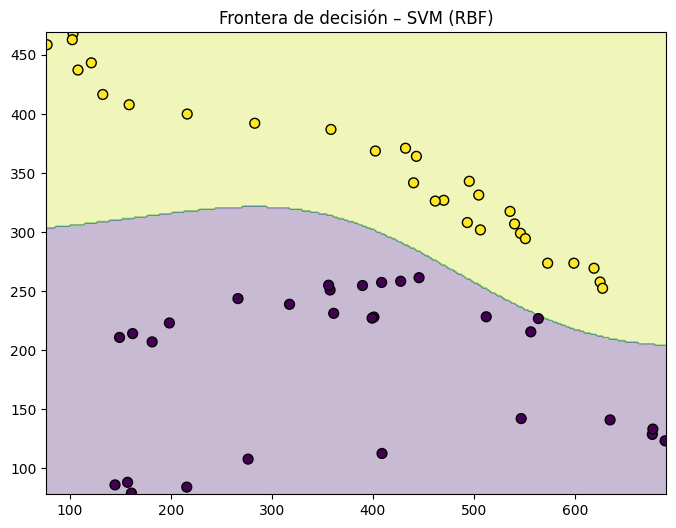

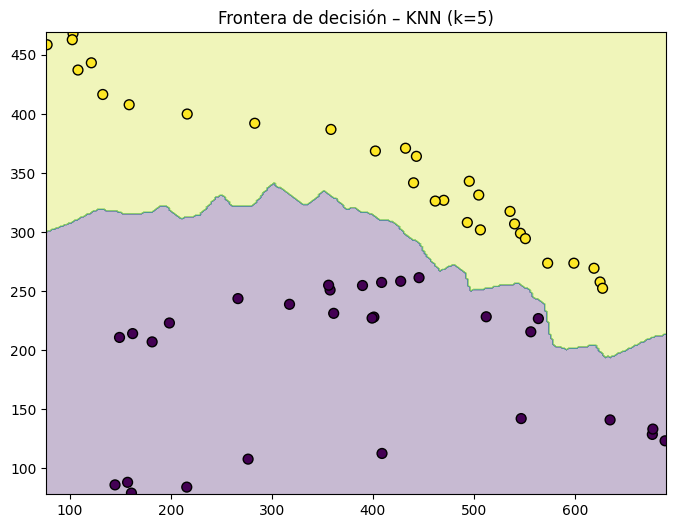

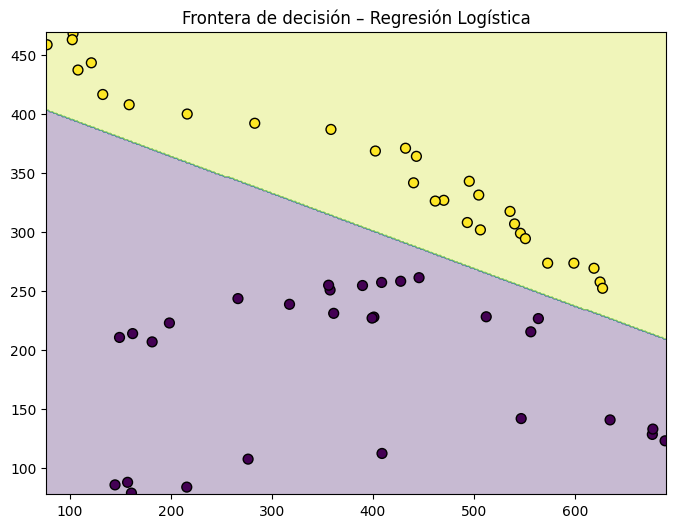

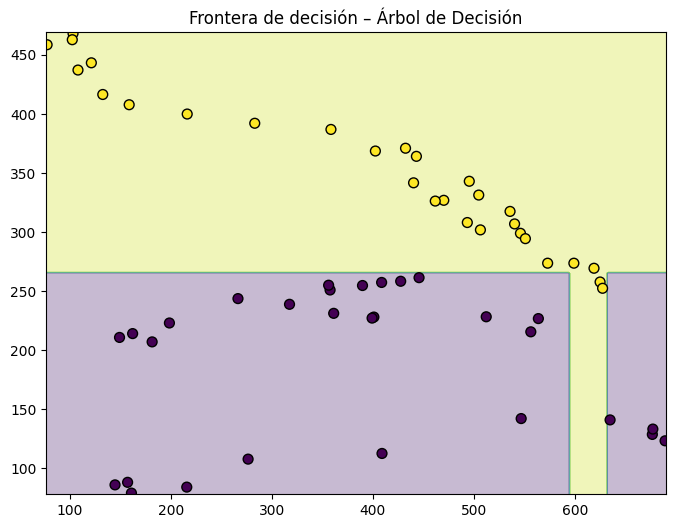

In [24]:
# =====================
# 3. Entrenar, graficar y calcular métricas
# =====================
for nombre, modelo in models.items():

    # Entrenamiento
    modelo.fit(X, y)
    y_pred = modelo.predict(X)

    # Métricas
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, average='binary')  # Ajusta average según tus clases
    rec = recall_score(y, y_pred, average='binary')
    f1 = f1_score(y, y_pred, average='binary')

    metricas.append([nombre, acc, prec, rec, f1])

    # Gráfica
    plot_decision_boundary(modelo, X, y, f"Frontera de decisión – {nombre}")
    
    





In [25]:

# =====================
# 4. Tabla resumen de métricas
# =====================
df_metricas = pd.DataFrame(metricas, columns=[
    "Modelo", "Accuracy", "Precision", "Recall", "F1 Score"
])

df_metricas

,Modelo,Accuracy,Precision,Recall,F1 Score
0,SVM (RBF),1.0,1.0,1.0,1.0
1,KNN (k=5),1.0,1.0,1.0,1.0
2,Regresión Logística,1.0,1.0,1.0,1.0
3,Árbol de Decisión,1.0,1.0,1.0,1.0
